In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model



In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Task-1

In [5]:
x = df[['Mileage']]
y = df[['Price']]

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

Text(0.5, 1.0, 'Mileage vs Price')

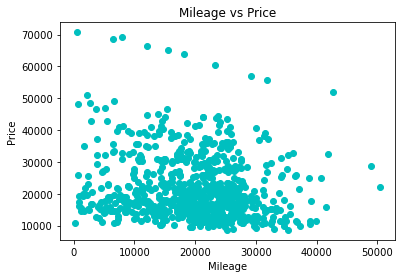

In [13]:
plt.scatter(x, y, color='c')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [15]:
print('intercept:', regressor.intercept_)

intercept: [24764.55900606]


In [16]:
print('coefficients:', regressor.coef_)

coefficients: [[-0.1725205]]


In [17]:
print('r-squared:', regressor.score(x, y))

r-squared: 0.02046344732348948


#### Since the R^2 Score is low this equation is not good fit for this data

## Task-2

In [18]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
y = df[['Price']]

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [20]:
print('intercept:', regressor.intercept_)

intercept: [6758.7551436]


In [21]:
print('coefficients:', regressor.coef_)

coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [22]:
print('r-squared:', regressor.score(x, y))

r-squared: 0.446264353672838


In [23]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


## Task-3

In [24]:
pd.get_dummies(df, columns=["Make","Model","Type"]).head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [25]:
x, y = df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]], df[["Price"]]

In [26]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [27]:
x = pd.get_dummies(x, drop_first=True)
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(x_test) 
y_pred

array([[16046.63516594],
       [10556.37458069],
       [21970.69692375],
       [13943.82404091],
       [17919.64739291],
       [13978.48943521],
       [25818.60070263],
       [18333.8211012 ],
       [37102.80832688],
       [29555.24124474],
       [16857.16423817],
       [37032.78913433],
       [12709.67687254],
       [28968.07556204],
       [19664.37372372],
       [22599.89688975],
       [17725.67101145],
       [30829.96379404],
       [14055.24553272],
       [15293.89195127],
       [18657.7636198 ],
       [15087.75749105],
       [17214.07916721],
       [48474.96990664],
       [22491.15742061],
       [22387.97600719],
       [28670.63943236],
       [21947.61627842],
       [29818.8580876 ],
       [35887.13523515],
       [16316.9254055 ],
       [17430.42009973],
       [ 9836.50553593],
       [17116.45230638],
       [18885.25697033],
       [45295.01321021],
       [22083.135217  ],
       [12362.0325056 ],
       [ 9093.19816765],
       [13445.26090378],


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
(mean_squared_error(y_test, y_pred))**0.5

1602.9189605474712

In [32]:
print('R2- SCORE: ',r2_score(y_test, y_pred))

R2- SCORE:  0.9696620778940501
